# MIDAS events reconstruction

Load packages, setup libraries

In [1]:
import sys
import numpy as np
from pyreco.manager.manager import Manager

Welcome to JupyROOT 6.30/04


Select here midas data, output filename and configuration file

In [2]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib ipympl

In [4]:
filename = '/home/sarthak/my_projects/argset/data/run00046.mid.lz4'
outfile = 'jupyR466s10'
confile = 'argset.ini'
tmin,tmax=0,1750

Initialize manager

In [5]:
cmdline_args = f'--config {confile} -o {outfile} -i {filename}'
m = Manager( midas=True, cmdline_args=cmdline_args)
# m = Manager( midas=True) #, cmdline_args=cmdline_args)
baseline_samples = m.config('reco', 'bl_to', 'int')

PyReco path: /home/sarthak/my_projects/pyreco/pyreco/__init__.py


Reading default config file: config.ini
Reading config file: argset.ini
Updating configuration parameters.


Midas Reader: Active
Adding white noise with  1.4 mV RMS


Reconstruction Algorithms: Activated
subrun 0: /home/sarthak/my_projects/argset/data/run00046.mid.lz4


Gain: Active


Event loop

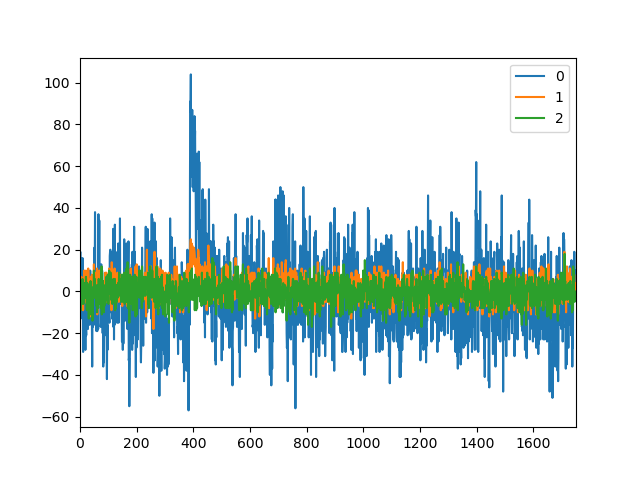

In [13]:
#nev_max = m.config('base', 'nevents', 'int')
nev_max = 2
plt.close(1)
plt.figure(1)
for nev, event in enumerate(m.midas):
    #print(nev, event, event.nchannels)
    if nev < 2: continue
    if nev > nev_max: break
    if event is None: continue
    if event.nchannels == 0: continue

    wfs = event.adc_data
    for i,wf in enumerate(event.adc_data):
        wfs[i] = wf-event.adc_baseline[i]
        plt.plot(wfs[i], label=f'{i}')
        
    #wfs = m.algos.get_subtracted_waveform(event.adc_data)
    #wfs = wfs[0:-1,:]
    #for i,wf in enumerate(wfs[0::3,:]):
    #    plt.plot(-wf, label=f'{i}')

plt.xlim(tmin,tmax)
plt.legend()
plt.show()

Filtering with ARMA

(0.0, 1750.0)

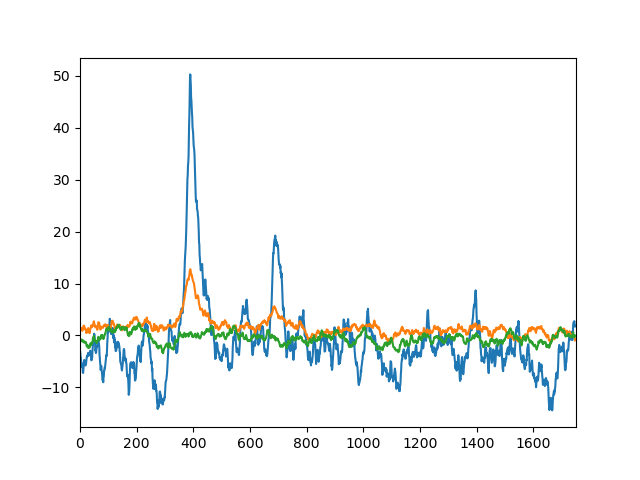

In [14]:
plt.close(2)
plt.figure(2)
from pyreco.reco.filtering import WFFilter
mfilter = WFFilter(m.config)
flt = np.reshape(mfilter.numba_fast_filter(wfs),newshape=wfs.shape)
for i,wf in enumerate(flt):
        plt.plot(wf, label=f'{i}')

plt.xlim(tmin,tmax)
# plt.show()

Running average filter

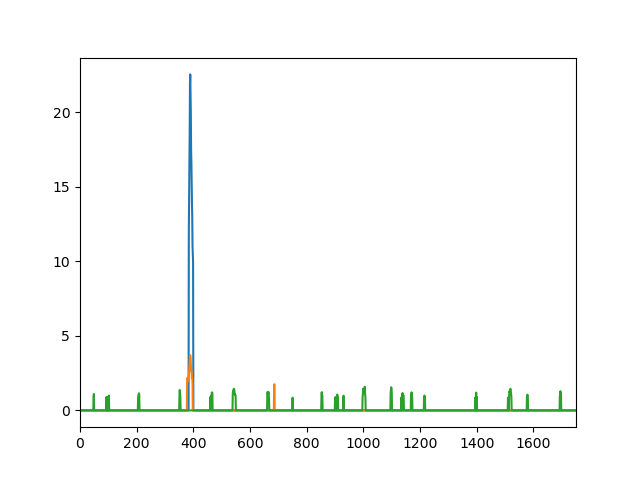

In [15]:
plt.close(3)
plt.figure(3)
mas = m.algos.running_mean(flt,gate=60)
flt = flt - mas 
flt = np.where(flt>0,flt, 0)
for i,wf in enumerate(flt):
    rms = m.algos.get_rms(wf)    
    plt.plot(np.where(wf > 3*rms, wf, 0), label=f'{i}')

plt.xlim(tmin,tmax)
plt.show()